In [1]:
#https://raw.githubusercontent.com/IBM/telco-customer-churn-on-icp4d/master/data/Telco-Customer-Churn.csv

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
import seaborn as sns
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
No     5174
Yes    1869
Name: Churn, dtype: int64
380


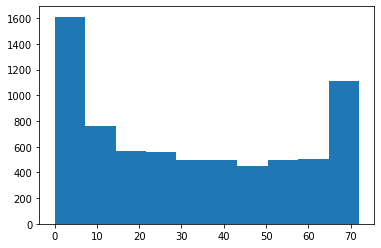

1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64


In [28]:
df=pd.read_csv('https://raw.githubusercontent.com/dnishimoto/python-deep-learning/master/telco_customer_churn.csv')
print(df.columns)

contractChurn=df[df['Churn']=='Yes'].groupby('Contract')['Churn'].count()

df['MonthlyCharges']=pd.to_numeric(df['MonthlyCharges'],errors='coerce')
df['TotalCharges']=pd.to_numeric(df['TotalCharges'],errors='coerce')

ini_array=df['TotalCharges'].values

#print(ini_array)
#insert an average for the missing total charges
res = np.where(np.isnan(ini_array), np.ma.array(ini_array, 
               mask = np.isnan(ini_array)).mean(axis = 0), ini_array)  

df['TotalCharges']=res

#print(len(df[df['Churn']=='Yes']))
#print(len(df[df['Churn']=='No']))

print (df['Churn'].value_counts())

#print(df.head())

filter1=df['Churn']=='Yes'
filter2=df['tenure']<=1
result=df[filter1 & filter2]


print(len(result))
plt.hist(df['tenure'], bins=10)
plt.show()
#print(df[df['tenure']>50])

print (df['tenure'].value_counts())


df['Churn']=df['Churn'].astype('category').cat.codes
df['gender']=df['gender'].astype('category').cat.codes
df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['Partner']=df['Partner'].astype('category').cat.codes
df['Dependents']=df['Dependents'].astype('category').cat.codes
df['PhoneService']=df['PhoneService'].astype('category').cat.codes
df['MultipleLines']=df['MultipleLines'].astype('category').cat.codes
df['InternetService']=df['InternetService'].astype('category').cat.codes

df['OnlineSecurity']=df['OnlineSecurity'].astype('category').cat.codes
df['OnlineBackup']=df['OnlineBackup'].astype('category').cat.codes
df['DeviceProtection']=df['DeviceProtection'].astype('category').cat.codes
df['TechSupport']=df['TechSupport'].astype('category').cat.codes

df['StreamingTV']=df['StreamingTV'].astype('category').cat.codes
df['StreamingMovies']=df['StreamingMovies'].astype('category').cat.codes
df['Contract']=df['Contract'].astype('category').cat.codes
df['PaperlessBilling']=df['PaperlessBilling'].astype('category').cat.codes
df['PaymentMethod']=df['PaymentMethod'].astype('category').cat.codes


#print(df.head())

   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


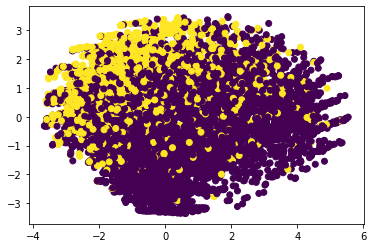

In [3]:
X=df[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']]


y=df['Churn']

print(X.head())

sc_X = StandardScaler()
X = sc_X.fit_transform(X)

labels=df['Churn'].values

pca=PCA(n_components=2)
pca.fit(X)

transformed=pca.transform(X)
print(transformed.shape)

xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=labels)
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


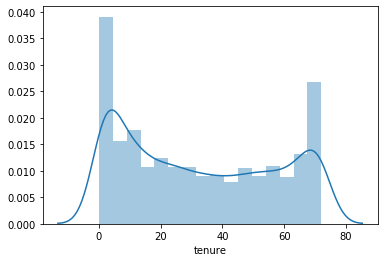

In [4]:
sns.distplot(df['tenure'])
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


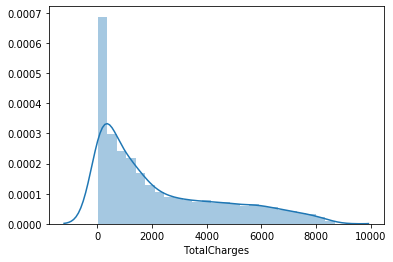

In [5]:
sns.distplot(df['TotalCharges'])
plt.show()

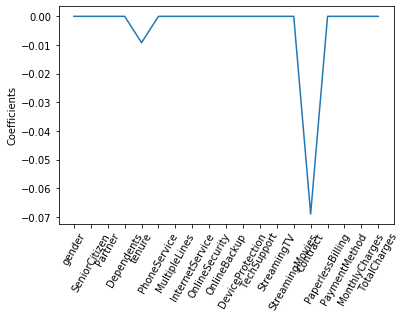

In [6]:
names=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
lasso=Lasso(alpha=0.1)
lasso_coef=lasso.fit(X,y).coef_

_ = plt.plot(range(len(names)),lasso_coef)
_ = plt.xticks(range(len(names)),names,rotation=60)
_ = plt.ylabel('Coefficients')
plt.show()

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


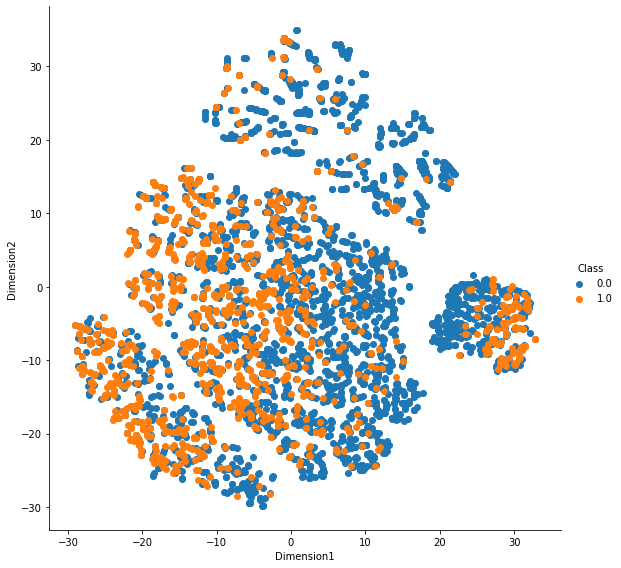

In [7]:
standardized_data = StandardScaler().fit_transform(X)

data_2k = standardized_data[0:5000]
labels_2k = y[0:5000]

model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=400)

tsne_data = model.fit_transform(data_2k)

# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, labels_2k)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dimension1", "Dimension2", "Class"))

# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue="Class", size=8).map(plt.scatter, 'Dimension1', 'Dimension2').add_legend()
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33, stratify = y, random_state = 42)
lr = LogisticRegression(verbose = 3, warm_start = True)
lr.fit(X_train, y_train) 

[LibLinear]

C:\Users\dnishimoto.BOISE\AppData\Local\Continuum\anaconda3\envs\deeplearning\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=3, warm_start=True)

Text(0, 0.5, 'TPR')

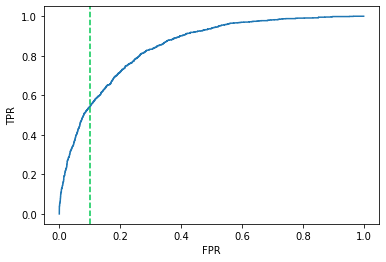

In [9]:
ytrain_pred_probas = lr.predict_proba(X_train)[:, 1]   # prob of predict as 1
fpr, tpr, thresholds = roc_curve(y_train, ytrain_pred_probas)   # precision_recall_curve
roc = pd.DataFrame({'FPR':fpr,'TPR':tpr,'Thresholds':thresholds})

_ = plt.figure()
plt.plot(roc.FPR, roc.TPR)
plt.axvline(0.1, color = '#00C851', linestyle = '--')
plt.xlabel("FPR")
plt.ylabel("TPR")

Predicted churn count  531


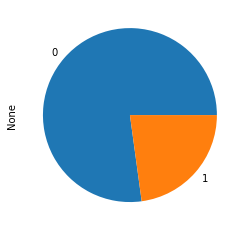

Accuracy is %s 80.12903225806451


ValueError: DataFrame constructor not properly called!

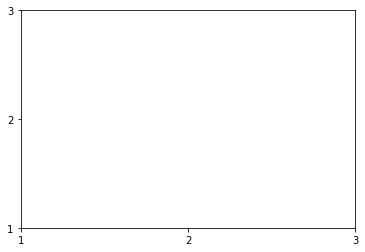

In [10]:
y_pred=lr.predict(X_test)

print("Predicted churn count ",len(y_pred[y_pred==1]))
buffer=pd.Series(y_pred)
buffer.value_counts().plot(kind='pie')
plt.show()

#print(confusion_matrix(y_test,y_pred))
# true positive     true negative
# false negative    false positive
print("Accuracy is %s",lr.score(X_test,y_test)*100)

#confusion_matrix = confusion_matrix(y_test, y_pred)

class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

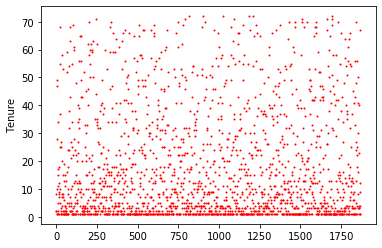

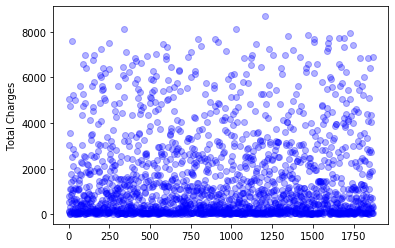

Correlation between tenure and totalCharges %s 0.9540174529269917
New customers represent the highest risk for churn. Offers and discount pricing and new features should be constantly offered to new customers


In [11]:
departed=df[df['Churn']==1]

tenure=departed['tenure']
totalCharges=departed['TotalCharges']

x=np.arange(0,len(tenure))

_=plt.scatter(x=x,y=tenure, c='red',s=1)
plt.ylabel('Tenure')
plt.show()

_=plt.scatter(x=x,y=totalCharges,c='blue',alpha=0.3)
plt.ylabel('Total Charges')
plt.show()

#####look for correlation between tenure and totalCharges which should be strong
dx = tenure - np.mean(tenure)
dy = totalCharges - np.mean(totalCharges)

zx=dx/np.std(tenure)
zy=dy/np.std(totalCharges)


######Correlation
###mean of the normalized distribution
correlation=np.mean(zx*zy)

print("Correlation between tenure and totalCharges %s", correlation)

print("New customers represent the highest risk for churn. Offers and discount pricing and new features should be constantly offered to new customers")




#x=np.arange(0,correlation.value_count())

#_=plt.scatter(x=x,y=correlation, c='green',s=1)
#plt.ylabel('Correlation')
#plt.show()


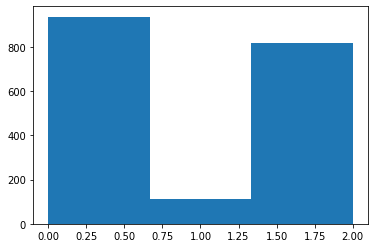

Contract Types and counts for departing customers
Contract
Month-to-month    1655
One year           166
Two year            48
Name: Churn, dtype: int64


In [31]:
departed=df[df['Churn']==1]

streaming_movie=departed['StreamingMovies']

plt.hist(streaming_movie,bins=3)
plt.show()

print("Contract Types and counts for departing customers")
print(contractChurn)

